In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [27]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [28]:
ürün = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\kahvaltilik.png',0)

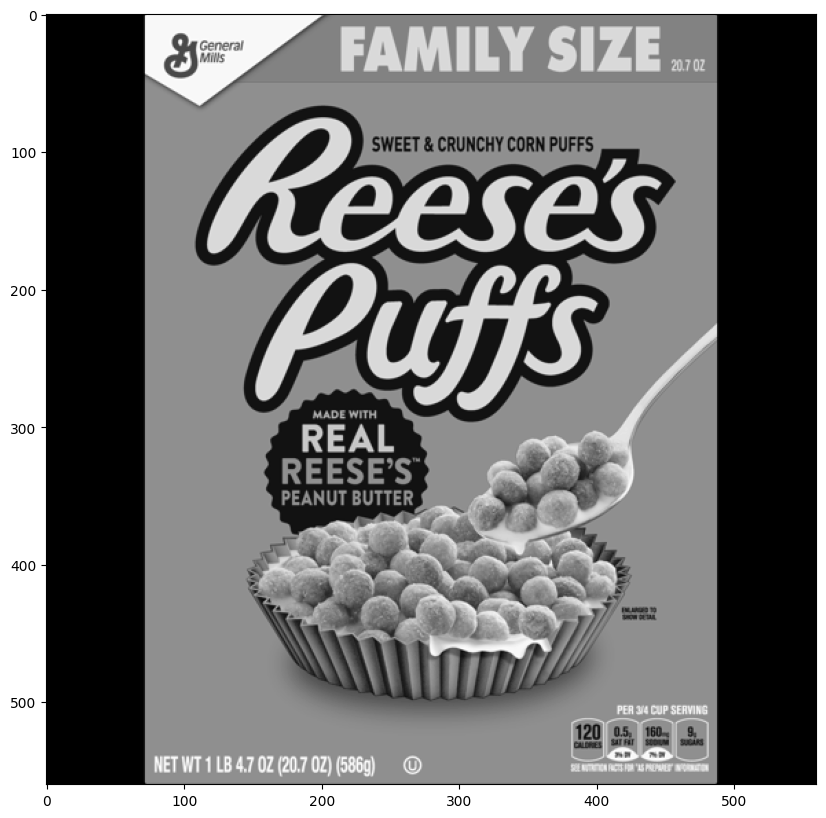

In [29]:
display(ürün)

In [30]:
raf = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\raf.jpg',0)

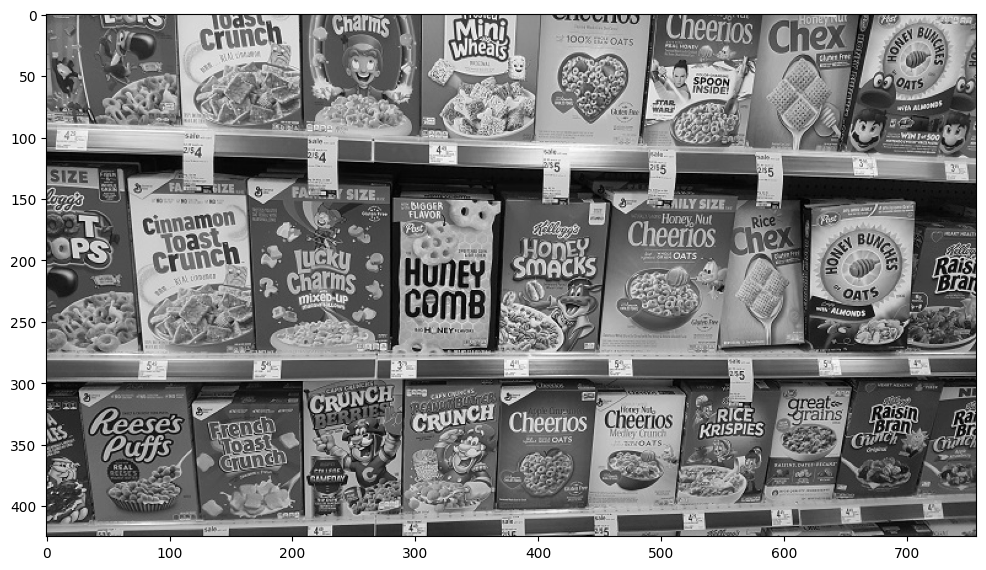

In [31]:
display(raf)

### Brute Force Detection with ORB descriptors

In [32]:
orb = cv2.ORB_create() 

In [33]:
kp1, des1 = orb.detectAndCompute(ürün,None) # None = mask parametresi (mask = maskeleme) key pointleri bulmaya çalışıyoruz.kp1 = key point1, des1 = descriptor1
kp2, des2 = orb.detectAndCompute(raf,None)

In [34]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # crossCheck = eşleşme kontrolü yapar. BFMatcher = Brute Force Matcher şu işe yarıyor: iki görüntü arasındaki tüm eşleşmeleri buluyor ve en iyi eşleşmeleri seçiyor. burada bir obje oluşturmuş oluyoruz.

In [35]:
matches = bf.match(des1,des2) # burada da eşleşmeleri buluyoruz.

In [36]:
matches = sorted(matches, key = lambda x:x.distance) # eşleşmeleri mesafelerine göre sıralıyoruz.lambda x:x.distance = mesafeye göre sırala. işlemi yapan kısım bu

In [37]:
cizdirme = cv2.drawMatches(ürün,kp1,raf,kp2,matches[:25],None,flags=2) # burada da eşleşmeleri çizdiriyoruz. ilk 25 eşleşmeyi çizdirdik. flags = 2 = eşleşmeleri çizdirmek için kullanılan parametre

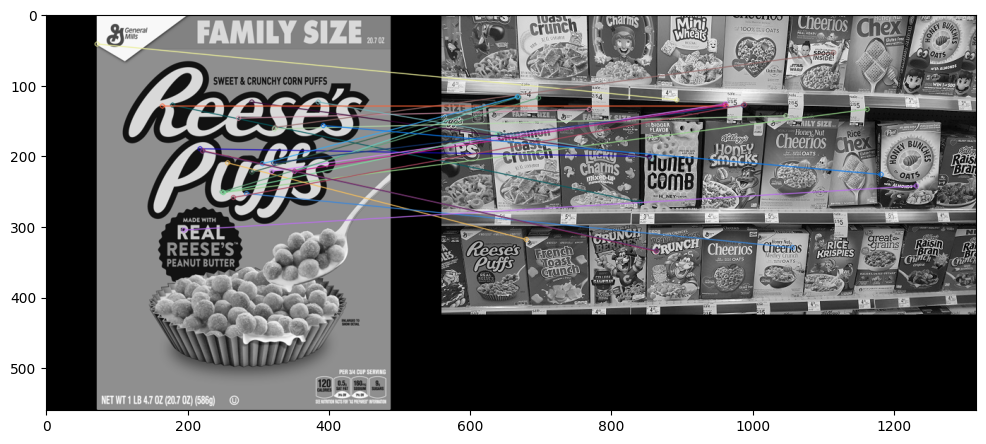

In [38]:
display(cizdirme)

## orb descriptoru ürünü bulmada baya zorlandı

### Brute - Force Matching ile SIFT Descriptors ve RAtio Test

In [39]:
sift = cv2.xfeatures2d.SIFT_create() # sift = scale invariant feature transform. sift ile orb arasındaki fark: sift daha hassas ve daha yavaş. orb daha hızlı ve daha az hassas. 

In [25]:
kp1 , des1 = sift.detectAndCompute(ürün,None) # detectAndCompute = sift ile keypointleri ve descriptorları buluyoruz.
kp2 , des2 = sift.detectAndCompute(raf,None)

In [40]:
bf = cv2.BFMatcher() # obje oluşturduk
matches = bf.knnMatch(des1,des2,k=2) # knnMatch = k nearest neighbor match. k = 2 = en yakın 2 komşuyu bul.

In [42]:
type(matches) # matches bir liste

tuple

In [41]:
matches # burada da eşleşmeleri görebiliyoruz.en iyi olasılıklara sahip değerler olarak listede tutuyoruz.

((< cv2.DMatch 000001A3BF995C70>, < cv2.DMatch 000001A3BFD9FC30>),
 (< cv2.DMatch 000001A3BFD9FB10>, < cv2.DMatch 000001A3BFD9FD50>),
 (< cv2.DMatch 000001A3BB48F590>, < cv2.DMatch 000001A3BFD7E630>),
 (< cv2.DMatch 000001A3BFD7E650>, < cv2.DMatch 000001A3BFD7E950>),
 (< cv2.DMatch 000001A3BFD7EE70>, < cv2.DMatch 000001A3BFD7E9B0>),
 (< cv2.DMatch 000001A3BFD7E510>, < cv2.DMatch 000001A3BFD7ED30>),
 (< cv2.DMatch 000001A3BFD7EAD0>, < cv2.DMatch 000001A3BFD7E490>),
 (< cv2.DMatch 000001A3BFD7E110>, < cv2.DMatch 000001A3BFD7E130>),
 (< cv2.DMatch 000001A3BFD7E2F0>, < cv2.DMatch 000001A3BFD7E530>),
 (< cv2.DMatch 000001A3BFD7E370>, < cv2.DMatch 000001A3BFD7ECF0>),
 (< cv2.DMatch 000001A3BFD7E690>, < cv2.DMatch 000001A3BFD7ECD0>),
 (< cv2.DMatch 000001A3BFD7EEB0>, < cv2.DMatch 000001A3BFD7EB90>),
 (< cv2.DMatch 000001A3BFD7EED0>, < cv2.DMatch 000001A3BFD7E6B0>),
 (< cv2.DMatch 000001A3BFD7E310>, < cv2.DMatch 000001A3BFD7EEF0>),
 (< cv2.DMatch 000001A3BFD7EE90>, < cv2.DMatch 000001A3BFD7E4B

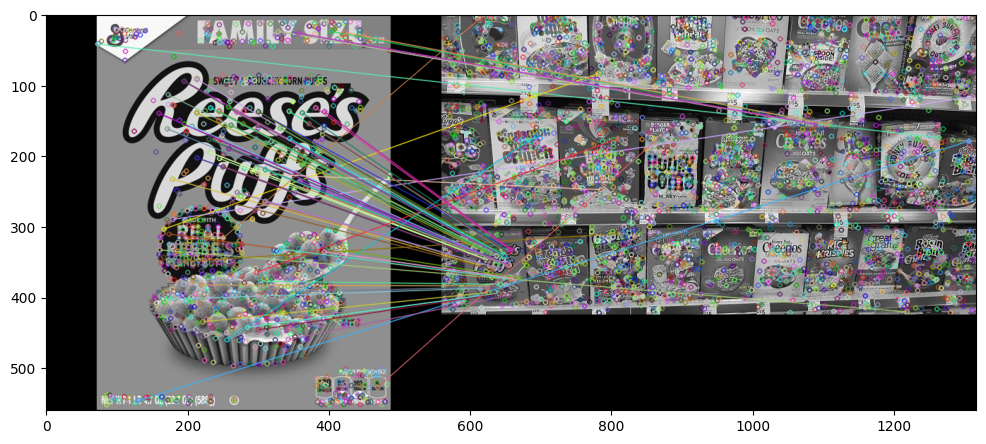

In [64]:
good = [] # burada da en iyi olasılıklara sahip değerleri tutuyoruz.
for match1,match2 in matches:
    if match1.distance < 0.75 * match2.distance: # burada da en iyi olasılıklara sahip değerleri tutuyoruz.
        good.append([match1])

cizdirme = cv2.drawMatchesKnn(ürün,kp1,raf,kp2,good,None,flags=0) # burada da eşleşmeleri çizdiriyoruz.

display(cizdirme)

### FLANN based matcehr

In [47]:
sift = cv2.xfeatures2d.SIFT_create()

In [49]:
kp1, des1 = sift.detectAndCompute(ürün,None)
kp2, des2 = sift.detectAndCompute(raf,None)

In [51]:
FLANN_INDEX_KDTREE = 0 # burada da eşleşmeleri buluyoruz.
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)  # trees = 5 = ağaç sayısı şu işe yarıyor: eşleşmeleri bulurken ağaç sayısını 5 olarak belirledik.ağaç = veri yapısı
search_params = dict(checks=50) # checks = 50 = kontrol sayısı 

In [53]:
flann =cv2.FlannBasedMatcher(index_params,search_params) # burada da obje oluşturuyoruz.

In [54]:
matches = flann.knnMatch(des1,des2,k=2) # burada da eşleşmeleri buluyoruz.

In [56]:
matches # burada da eşleşmeleri görebiliyoruz.en iyi olasılıklara sahip değerler olarak listede tutuyoruz. k = 2 = en yakın 2 komşuyu bul.bu sayede 2 li sıra ile depoladık

((< cv2.DMatch 000001A3BF995C90>, < cv2.DMatch 000001A3BFD7E2D0>),
 (< cv2.DMatch 000001A3C09B1C10>, < cv2.DMatch 000001A3C09B1030>),
 (< cv2.DMatch 000001A3C09B1C50>, < cv2.DMatch 000001A3C09B1DF0>),
 (< cv2.DMatch 000001A3C09B1D50>, < cv2.DMatch 000001A3C09D02B0>),
 (< cv2.DMatch 000001A3C09D0330>, < cv2.DMatch 000001A3C09D0370>),
 (< cv2.DMatch 000001A3C09D02D0>, < cv2.DMatch 000001A3C09D0350>),
 (< cv2.DMatch 000001A3C09D03F0>, < cv2.DMatch 000001A3C09D00B0>),
 (< cv2.DMatch 000001A3C09D03D0>, < cv2.DMatch 000001A3C09D0390>),
 (< cv2.DMatch 000001A3C09D00D0>, < cv2.DMatch 000001A3C09D0410>),
 (< cv2.DMatch 000001A3C09D0430>, < cv2.DMatch 000001A3C09D0450>),
 (< cv2.DMatch 000001A3C09D0470>, < cv2.DMatch 000001A3C09D0490>),
 (< cv2.DMatch 000001A3C09D04B0>, < cv2.DMatch 000001A3C09D04D0>),
 (< cv2.DMatch 000001A3C09D04F0>, < cv2.DMatch 000001A3C09D0510>),
 (< cv2.DMatch 000001A3C09D0530>, < cv2.DMatch 000001A3C09D0550>),
 (< cv2.DMatch 000001A3C09D0570>, < cv2.DMatch 000001A3C09D059

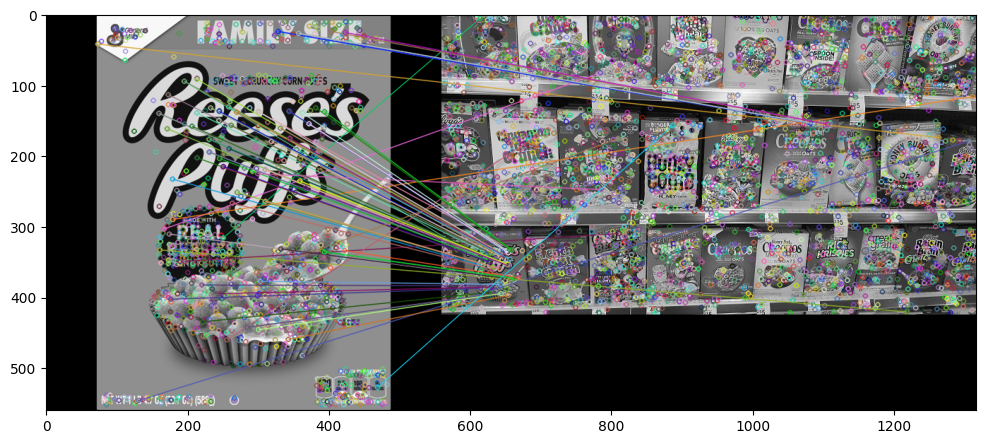

In [59]:
good = [] # burada da en iyi olasılıklara sahip değerleri tutuyoruz.    

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75 * match2.distance: # burada da en iyi olasılıklara sahip değerleri tutuyoruz.
        good.append(match1)

cizdirme3 = cv2.drawMatches(ürün,kp1,raf,kp2,good,None,flags=0) # burada da eşleşmeleri çizdiriyoruz.

display(cizdirme3)